In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

# Any results you write to the current directory are saved as output.

In [2]:
# def load_df(csv_path, nrows=None):
#     USE_COLUMNS = [
#         'channelGrouping', 'date', 'device', 'fullVisitorId', 'geoNetwork',
#         'socialEngagementType', 'totals', 'trafficSource', 'visitId',
#         'visitNumber', 'visitStartTime', 'customDimensions'
#         #'hits'
#     ]
#     JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
#     df = pd.read_csv(csv_path, 
#                      converters={column: json.loads for column in JSON_COLUMNS}, 
#                      dtype={'fullVisitorId': 'str'}, # Important!!
#                      nrows=nrows, usecols=USE_COLUMNS)
    
#     for column in JSON_COLUMNS:
#         column_as_df = json_normalize(df[column])
#         column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
#         df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
#     print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
#     return df

In [3]:
train_data = pd.read_csv('train_modified.csv') # Important!!
print(train_data.shape)
train_data.head()

/home/tintash/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(903653, 56)


,Unnamed: 0,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,...,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,...,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google


In [4]:
train_df = train_data.sample(frac=0.8,random_state=200)
test_df = train_data.drop(train_df.index)

In [5]:
train_df.columns.values

array(['Unnamed: 0', 'channelGrouping', 'date', 'fullVisitorId',
       'sessionId', 'socialEngagementType', 'visitId', 'visitNumber',
       'visitStartTime', 'device.browser', 'device.browserSize',
       'device.browserVersion', 'device.deviceCategory',
       'device.flashVersion', 'device.isMobile', 'device.language',
       'device.mobileDeviceBranding', 'device.mobileDeviceInfo',
       'device.mobileDeviceMarketingName', 'device.mobileDeviceModel',
       'device.mobileInputSelector', 'device.operatingSystem',
       'device.operatingSystemVersion', 'device.screenColors',
       'device.screenResolution', 'geoNetwork.city', 'geoNetwork.cityId',
       'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.latitude', 'geoNetwork.longitude', 'geoNetwork.metro',
       'geoNetwork.networkDomain', 'geoNetwork.networkLocation',
       'geoNetwork.region', 'geoNetwork.subContinent', 'totals.bounces',
       'totals.hits', 'totals.newVisits', 'totals.pageviews',
       'tota

In [6]:
# %%time
# train_df = load_df("../input/train_v2.csv")
# test_df = load_df("../input/test_v2.csv")

In [7]:
print(train_df.columns.difference(test_df.columns))
print(test_df.columns.difference(train_df.columns))

Index([], dtype='object')
Index([], dtype='object')


In [8]:
train_df = train_df.drop(labels=['trafficSource.campaign'],axis=1)
# train_df = train_df.drop(labels=['totals.transactionRevenue'],axis=1)
# test_df = test_df.drop(labels=['totals.transactionRevenue'],axis=1)

In [9]:
#Converting the datatype of date field
train_df['date']= pd.to_datetime(train_df['date'],format='%Y%m%d')
test_df['date']= pd.to_datetime(test_df['date'],format='%Y%m%d')
train_df.head()

,Unnamed: 0,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,...,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
548725,548725,Organic Search,2017-05-23,3702632045024960671,3702632045024960671_1495561117,Not Socially Engaged,1495561117,1,1495561117,Safari,...,NaN,NaN,NaN,NaN,NaN,NaN,(not provided),organic,NaN,google
697375,697375,Organic Search,2017-07-19,219064891723945627,0219064891723945627_1500476689,Not Socially Engaged,1500476689,2,1500476689,Chrome,...,NaN,NaN,NaN,NaN,NaN,True,(not provided),organic,NaN,google
474524,474524,Organic Search,2017-02-22,2389192114156853073,2389192114156853073_1487781578,Not Socially Engaged,1487781578,1,1487781578,Safari,...,NaN,NaN,NaN,NaN,NaN,NaN,(not provided),organic,NaN,google
399762,399762,Organic Search,2016-09-09,1397628877965755203,1397628877965755203_1473457757,Not Socially Engaged,1473457757,1,1473457757,Chrome,...,NaN,NaN,NaN,NaN,NaN,NaN,(not provided),organic,NaN,google
903103,903103,Display,2017-01-04,797740313994990797,0797740313994990797_1483518849,Not Socially Engaged,1483518849,2,1483518849,Firefox,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cpm,NaN,dfa


In [10]:
#We need to predict totals.transactionRevenue. Lets explore that variable
train_df['totals.transactionRevenue'] = train_df['totals.transactionRevenue'].astype('float')
print('Total records: ', len(train_df), 'customers doesnt contribute for revenue: ',train_df['totals.transactionRevenue'].isna().sum(), \
      'customers contributing revenue: ',len(train_df) - train_df['totals.transactionRevenue'].isna().sum())


Total records:  722922 customers doesnt contribute for revenue:  713707 customers contributing revenue:  9215


Purely an imbalanced dataset

In [11]:
#Lets start with data cleaning
#Find any unique value columns
print('Features with one unique values are :')
print(train_df.columns[train_df.nunique()==1])
new_df = train_df.drop(labels=train_df.columns[train_df.nunique()==1],axis=1)
test_df = test_df.drop(labels=train_df.columns[train_df.nunique()==1],axis=1)

Features with one unique values are :
Index(['socialEngagementType', 'device.browserSize', 'device.browserVersion',
       'device.flashVersion', 'device.language', 'device.mobileDeviceBranding',
       'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName',
       'device.mobileDeviceModel', 'device.mobileInputSelector',
       'device.operatingSystemVersion', 'device.screenColors',
       'device.screenResolution', 'geoNetwork.cityId', 'geoNetwork.latitude',
       'geoNetwork.longitude', 'geoNetwork.networkLocation', 'totals.bounces',
       'totals.newVisits', 'totals.visits',
       'trafficSource.adwordsClickInfo.criteriaParameters',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.campaignCode', 'trafficSource.isTrueDirect'],
      dtype='object')


In [12]:
print(new_df.shape)
pd.options.display.max_columns=new_df.shape[1]
print(new_df.info())
new_df.head()

(722922, 31)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 722922 entries, 548725 to 525874
Data columns (total 31 columns):
Unnamed: 0                                      722922 non-null int64
channelGrouping                                 722922 non-null object
date                                            722922 non-null datetime64[ns]
fullVisitorId                                   722922 non-null object
sessionId                                       722922 non-null object
visitId                                         722922 non-null int64
visitNumber                                     722922 non-null int64
visitStartTime                                  722922 non-null int64
device.browser                                  722922 non-null object
device.deviceCategory                           722922 non-null object
device.isMobile                                 722922 non-null bool
device.operatingSystem                          722922 non-null object
geoNetwork.city  

,Unnamed: 0,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.hits,totals.pageviews,totals.transactionRevenue,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
548725,548725,Organic Search,2017-05-23,3702632045024960671,3702632045024960671_1495561117,1495561117,1,1495561117,Safari,mobile,True,iOS,not available in demo dataset,Americas,United States,not available in demo dataset,comcast.net,not available in demo dataset,Northern America,10,10.0,NaN,NaN,NaN,NaN,NaN,NaN,(not provided),organic,NaN,google
697375,697375,Organic Search,2017-07-19,219064891723945627,0219064891723945627_1500476689,1500476689,2,1500476689,Chrome,desktop,False,Windows,not available in demo dataset,Americas,United States,not available in demo dataset,comcastbusiness.net,not available in demo dataset,Northern America,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,(not provided),organic,NaN,google
474524,474524,Organic Search,2017-02-22,2389192114156853073,2389192114156853073_1487781578,1487781578,1,1487781578,Safari,tablet,True,iOS,not available in demo dataset,Americas,United States,not available in demo dataset,(not set),not available in demo dataset,Northern America,4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,(not provided),organic,NaN,google
399762,399762,Organic Search,2016-09-09,1397628877965755203,1397628877965755203_1473457757,1473457757,1,1473457757,Chrome,desktop,False,Linux,not available in demo dataset,Europe,United Kingdom,not available in demo dataset,btcentralplus.com,not available in demo dataset,Northern Europe,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,(not provided),organic,NaN,google
903103,903103,Display,2017-01-04,797740313994990797,0797740313994990797_1483518849,1483518849,2,1483518849,Firefox,desktop,False,Windows,not available in demo dataset,Americas,United States,not available in demo dataset,rr.com,not available in demo dataset,Northern America,15,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cpm,NaN,dfa


Based on Initial glance of data we can drop following fields while exploring
* sessionId - Unique number for a session
* visitId - Nth visit fullVisitorId is visiting the store 
* visitStartTime - Time of Visit 


In [13]:

geofields = ['geoNetwork.city','geoNetwork.continent','geoNetwork.country','geoNetwork.metro','geoNetwork.networkDomain','geoNetwork.region','geoNetwork.subContinent']

for fields in geofields:
    temp_df = new_df.groupby(by=fields).size().sort_values(ascending=False).head(10)
    print(temp_df)
    print('*'*30)
    

geoNetwork.city
not available in demo dataset    406731
Mountain View                     32811
(not set)                         27240
New York                          21142
San Francisco                     16408
Sunnyvale                         10501
London                            10054
San Jose                           8205
Los Angeles                        6915
Bangkok                            6130
dtype: int64
******************************
geoNetwork.continent
Americas     360500
Asia         178817
Europe       158701
Oceania       12024
Africa        11736
(not set)      1144
dtype: int64
******************************
geoNetwork.country
United States     291889
India              40926
United Kingdom     29895
Canada             20819
Vietnam            19585
Turkey             16491
Thailand           16038
Germany            16016
Brazil             15815
Japan              15727
dtype: int64
******************************
geoNetwork.metro
not available in demo dat

                            visitId  totals.transactionRevenue
visitId                    1.000000                   0.262576
totals.transactionRevenue  0.262576                   1.000000


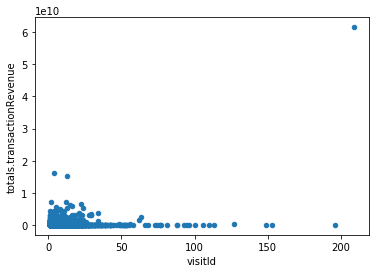

In [14]:
temp = new_df.groupby(by=['fullVisitorId']).agg({'visitId':'count','totals.transactionRevenue':'sum'})
print(temp.corr())
temp.plot(kind='scatter',x='visitId',y='totals.transactionRevenue')

No of visits doesn't have much relation with transactionRevenue

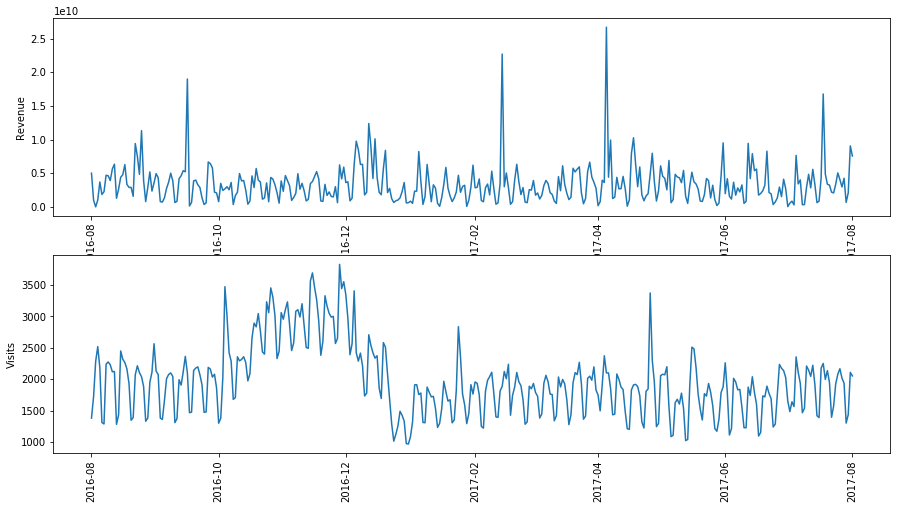

In [15]:
#Lets analyze how the visits and transactionRevenue trend with date
plot_df = new_df.groupby(by=['date']).agg({'fullVisitorId':'count','totals.transactionRevenue':'sum'}).reset_index()

fig = plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.plot(pd.to_datetime(plot_df['date']),plot_df['totals.transactionRevenue'])
plt.ylabel('Revenue')
plt.xticks(rotation=90)

plt.subplot(2,1,2)
plt.plot(pd.to_datetime(plot_df['date']),plot_df['fullVisitorId'])
plt.ylabel('Visits')
plt.xticks(rotation=90);

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

Numer of visits drasitically increases from October and reduces in December. But that didnt contribute much on revenue. As only one year of data available, we cannot identify any YoY pattern of data.

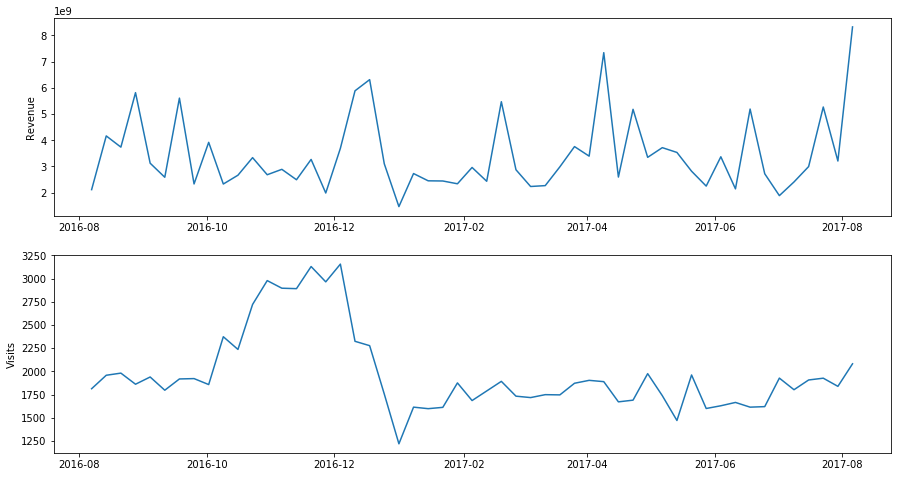

In [16]:
#Weekly pattern

plot_df = new_df.groupby(by=['date']).agg({'fullVisitorId':'count','totals.transactionRevenue':'sum'})

plot_df = plot_df.resample('W').mean()

plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.plot(plot_df.index,plot_df['totals.transactionRevenue'])
plt.ylabel('Revenue')

plt.subplot(2,1,2)
plt.plot(plot_df.index,plot_df['fullVisitorId'])
plt.ylabel('Visits');

(array([2.000e+00, 3.000e+00, 4.000e+00, 1.540e+02, 1.898e+03, 4.284e+03,
        1.541e+03, 3.260e+02, 3.600e+01, 3.000e+00]),
 array([ 9.21044037, 10.77370501, 12.33696965, 13.90023429, 15.46349893,
        17.02676357, 18.59002821, 20.15329285, 21.71655749, 23.27982213,
        24.84308677]),
 <a list of 10 Patch objects>)

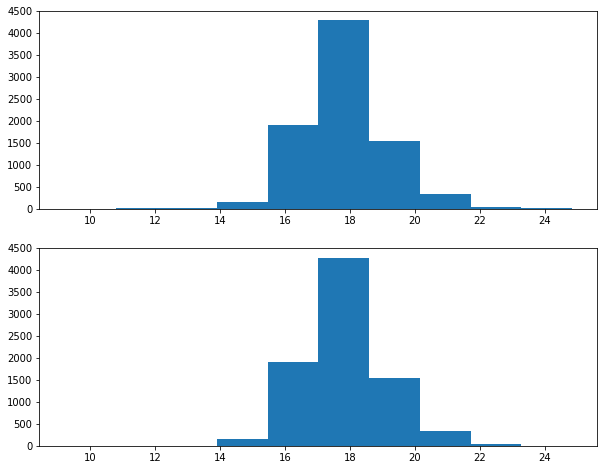

In [17]:
plot_df = new_df.groupby(by=['fullVisitorId']).agg({'channelGrouping':'count','totals.transactionRevenue':'sum'})

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.hist(np.log1p(plot_df[plot_df['totals.transactionRevenue']>0]['totals.transactionRevenue']))

plt.subplot(2,1,2)
plt.hist(np.log1p(plot_df[plot_df['totals.transactionRevenue']>0]['totals.transactionRevenue']))

In [18]:
#new_df = new_df.drop(labels=['sessionId','visitId','visitStartTime'])
new_df.isna().sum()

Unnamed: 0                                           0
channelGrouping                                      0
date                                                 0
fullVisitorId                                        0
sessionId                                            0
visitId                                              0
visitNumber                                          0
visitStartTime                                       0
device.browser                                       0
device.deviceCategory                                0
device.isMobile                                      0
device.operatingSystem                               0
geoNetwork.city                                      0
geoNetwork.continent                                 0
geoNetwork.country                                   0
geoNetwork.metro                                     0
geoNetwork.networkDomain                             0
geoNetwork.region                                    0
geoNetwork

In [19]:
new_df['totals.transactionRevenue'].fillna(value=0,inplace=True)
transaction_df = new_df[new_df['totals.transactionRevenue']>0.0]
nontransaction_df = new_df[new_df['totals.transactionRevenue']<=0]
print(transaction_df.shape, nontransaction_df.shape)
#new_df['totals.transactionRevenue']>0.0

(9215, 31) (713707, 31)


In [20]:
def getplot(df1, df2, groupfield):
    fig =plt.figure(figsize=(15,8))
    plt.subplot(2,1,1)
    plot_df = df1.groupby(by=[groupfield])['totals.transactionRevenue'].size().reset_index()
    plot_df = plot_df.sort_values(by=['totals.transactionRevenue'], ascending=False).head(10)
    plt1 = plt.bar(plot_df[groupfield],plot_df['totals.transactionRevenue'])

    plt.subplot(2,1,2)
    plot_df = df2.groupby(by=[groupfield])['totals.transactionRevenue'].size().reset_index()
    plot_df = plot_df.sort_values(by=['totals.transactionRevenue'], ascending=False).head(10)
    plt2 = plt.bar(plot_df[groupfield],plot_df['totals.transactionRevenue'])
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=90)
    #fig.tight_layout()
    return plt1, plt2

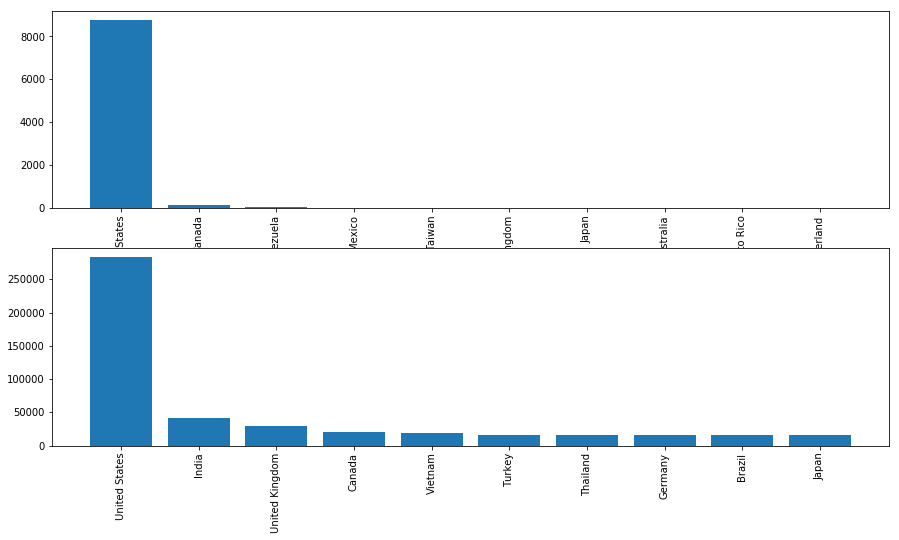

In [21]:
getplot(transaction_df,nontransaction_df,'geoNetwork.country');

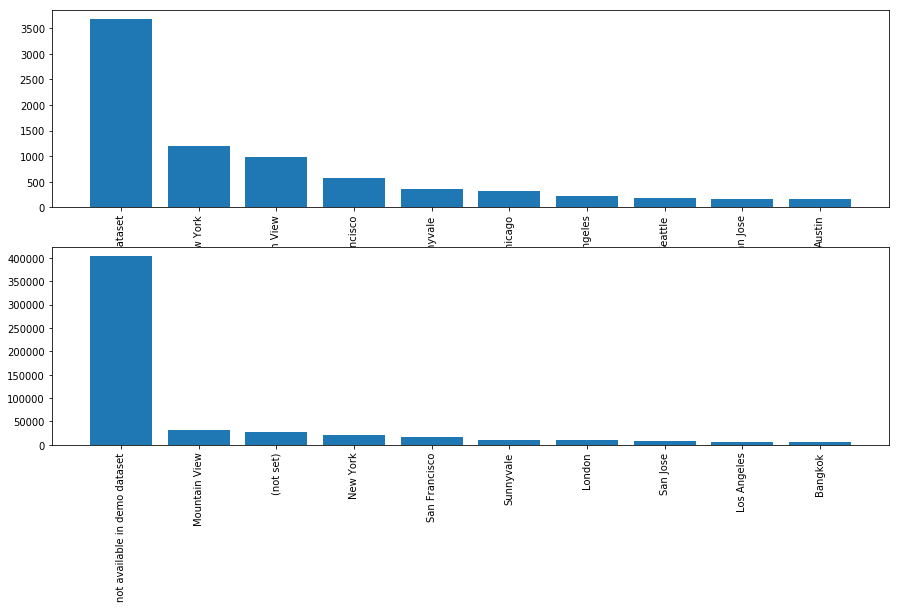

In [22]:
getplot(transaction_df,nontransaction_df,'geoNetwork.city');

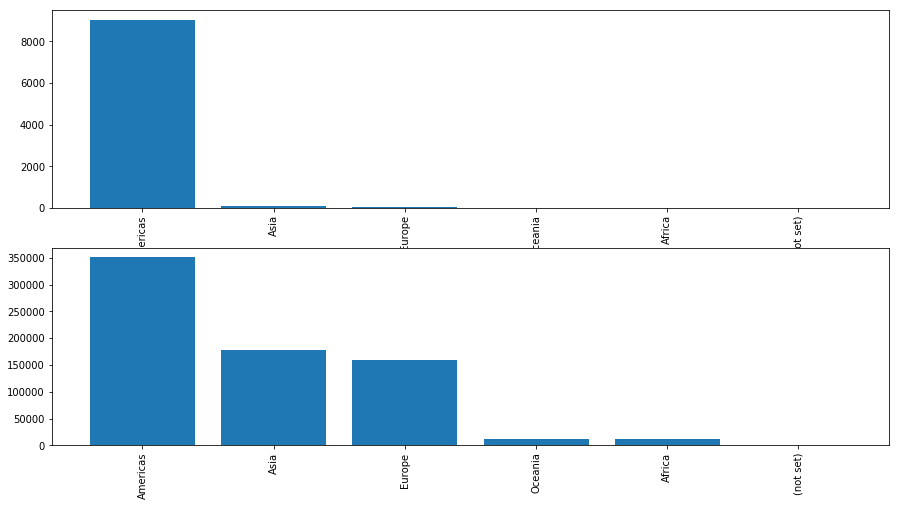

In [23]:
getplot(transaction_df,nontransaction_df,'geoNetwork.continent');

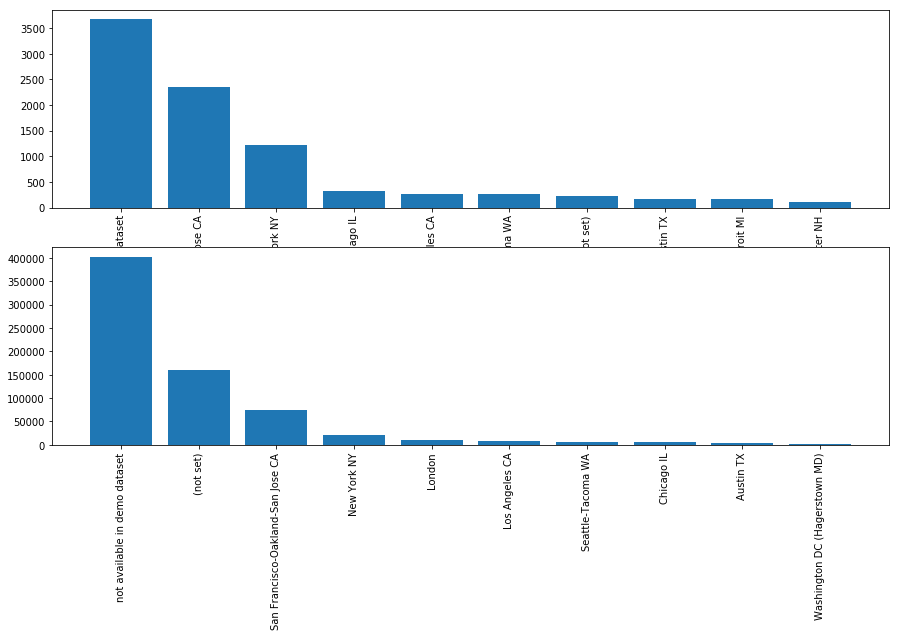

In [24]:
getplot(transaction_df,nontransaction_df,'geoNetwork.metro');

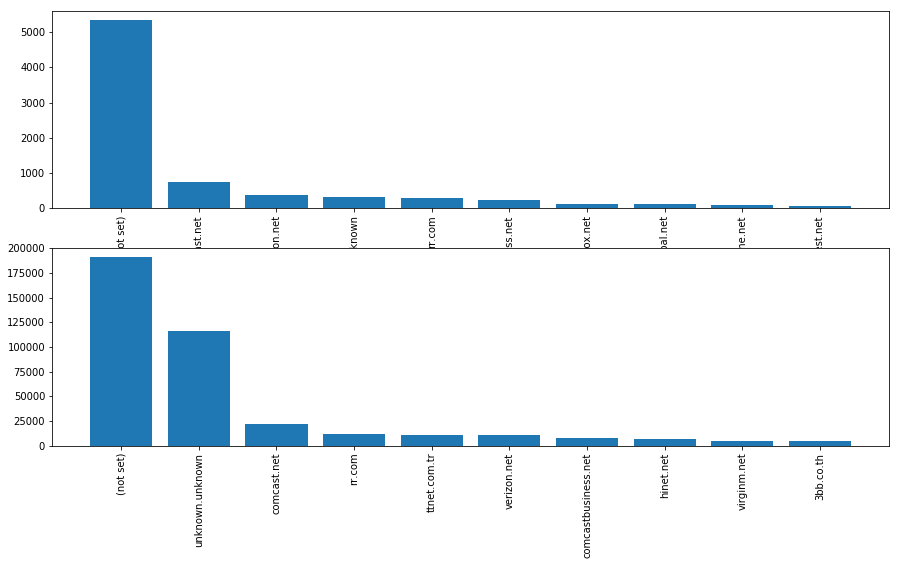

In [25]:
getplot(transaction_df,nontransaction_df,'geoNetwork.networkDomain');

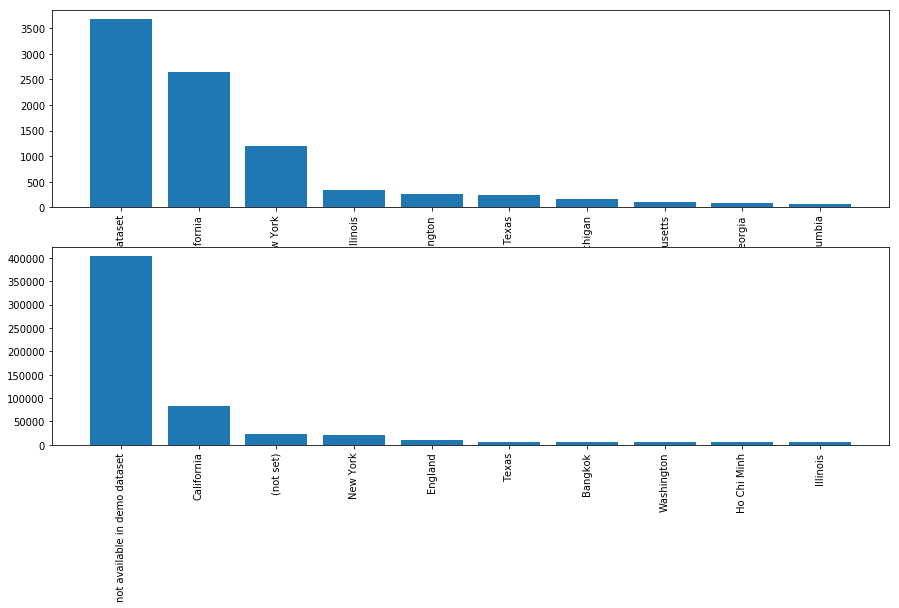

In [26]:
getplot(transaction_df,nontransaction_df,'geoNetwork.region');

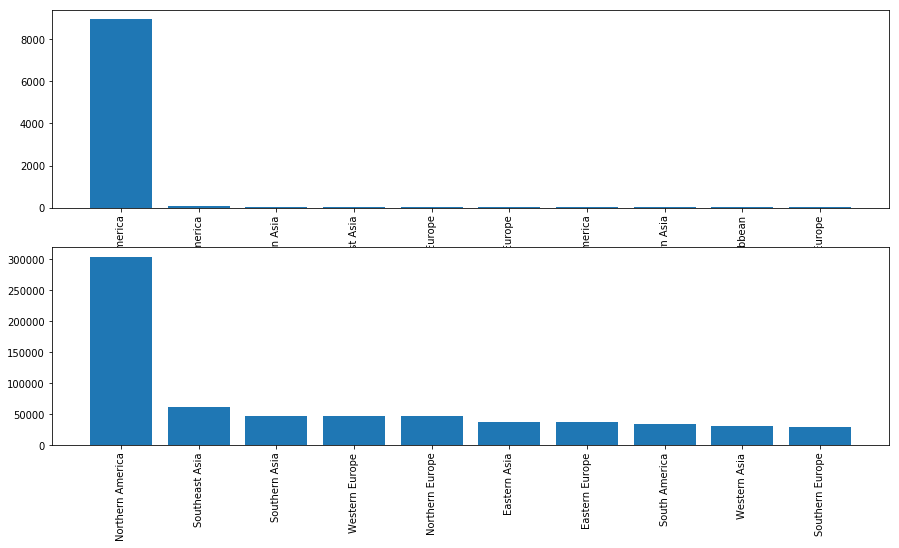

In [27]:
getplot(transaction_df,nontransaction_df,'geoNetwork.subContinent');

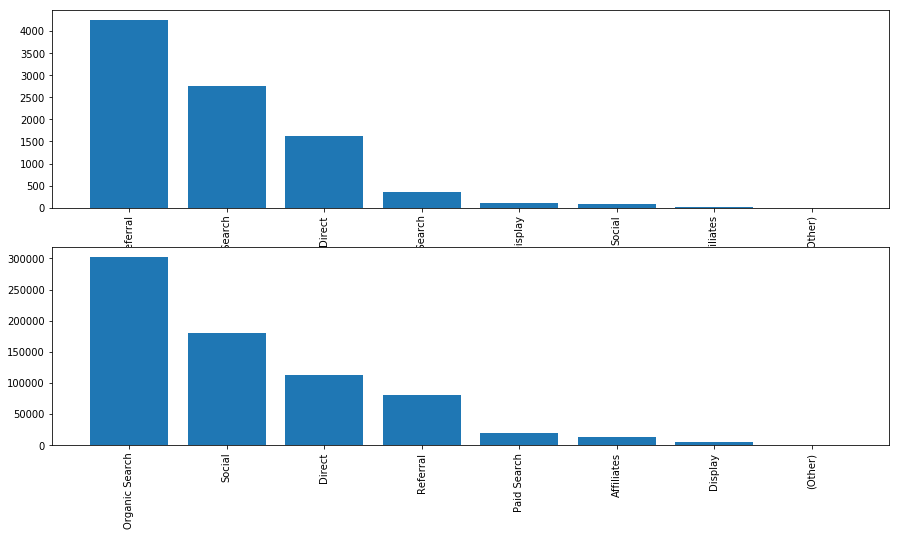

In [28]:
getplot(transaction_df,nontransaction_df,'channelGrouping');

Lets drop labels other than city and subcontinent. As city is the lower granular level in geo. As most values in city is 'not available' lets keep another variable subcontinent as an additional field.


In [29]:
new_df1 = new_df.drop(labels=['geoNetwork.region','geoNetwork.networkDomain','geoNetwork.metro','geoNetwork.continent','geoNetwork.country','visitId','visitStartTime'],axis=1)
test_df1 = test_df.drop(labels=['geoNetwork.region','geoNetwork.networkDomain','geoNetwork.metro','geoNetwork.continent','geoNetwork.country','visitId','visitStartTime'],axis=1)


Only one year of data is available. With Date or Month we couldn't find any relation. Lets drop it. 
device.isMobile is a duplicate variable as the detail is covered in deviceCategory


In [30]:
new_df1 = new_df1.drop(labels=['date','device.isMobile'], axis=1)
test_df1 = test_df1.drop(labels=['date','device.isMobile'], axis=1)

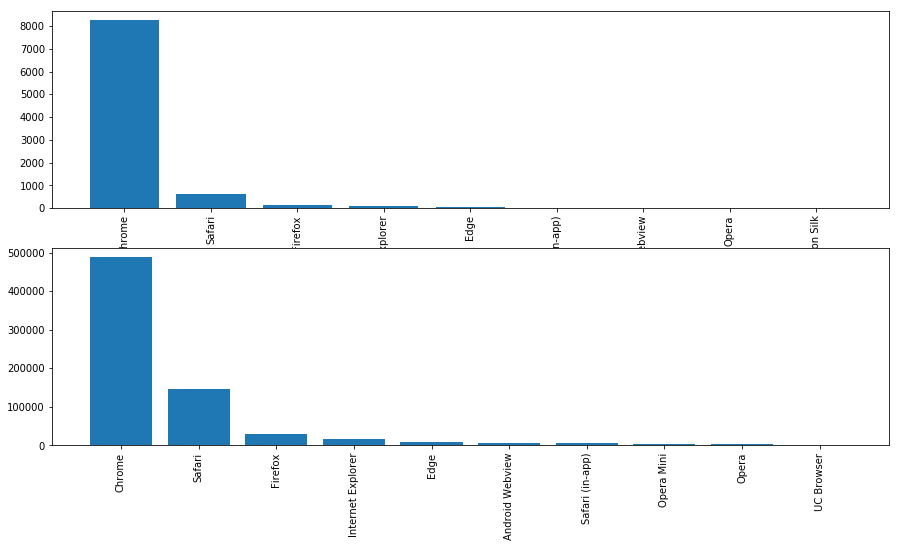

In [31]:
getplot(transaction_df,nontransaction_df,'device.browser');

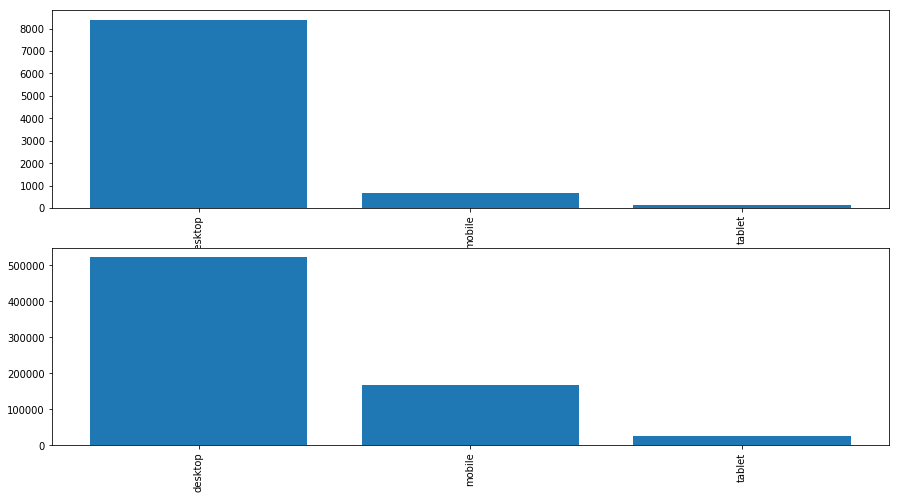

In [32]:
getplot(transaction_df,nontransaction_df,'device.deviceCategory');

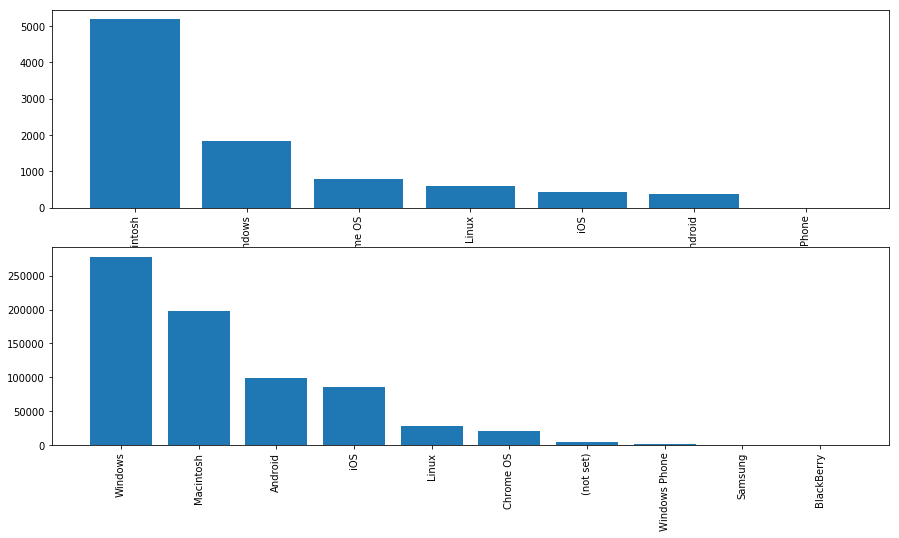

In [33]:
getplot(transaction_df,nontransaction_df,'device.operatingSystem');

/home/tintash/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


(<BarContainer object of 10 artists>, <BarContainer object of 10 artists>)

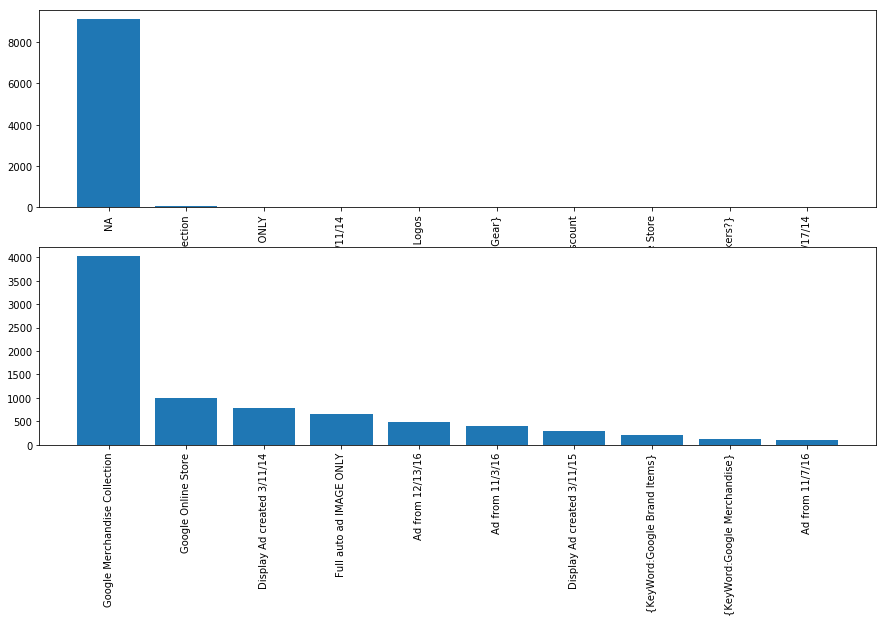

In [34]:
transaction_df['trafficSource.adContent'].fillna('NA',inplace=True)
getplot(transaction_df,nontransaction_df,'trafficSource.adContent')
#NA values seems to contribute more for revenue :p

(<BarContainer object of 10 artists>, <BarContainer object of 10 artists>)

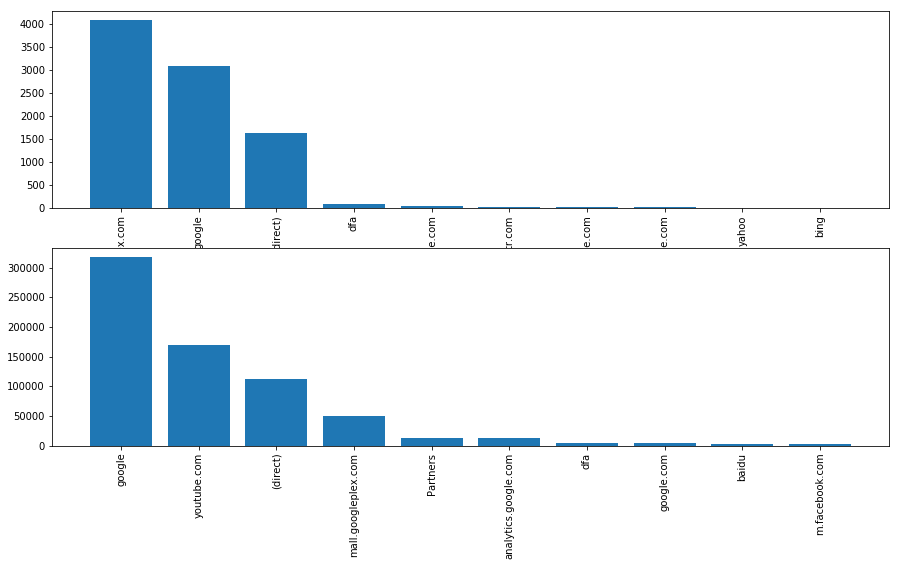

In [35]:
getplot(transaction_df,nontransaction_df,'trafficSource.source')

In [36]:
new_df1 = new_df1.drop(labels=['trafficSource.adwordsClickInfo.adNetworkType', 'trafficSource.adwordsClickInfo.gclId', 'trafficSource.adwordsClickInfo.page', 'trafficSource.adwordsClickInfo.slot', 'trafficSource.medium', 'trafficSource.medium', 'trafficSource.referralPath','trafficSource.source'],axis=1)
test_df1 = test_df1.drop(labels=['trafficSource.adwordsClickInfo.adNetworkType', 'trafficSource.adwordsClickInfo.gclId', 'trafficSource.adwordsClickInfo.page', 'trafficSource.adwordsClickInfo.slot', 'trafficSource.medium', 'trafficSource.medium', 'trafficSource.referralPath','trafficSource.source'],axis=1)
print(new_df1.shape)
new_df1.head()

(722922, 15)


,Unnamed: 0,channelGrouping,fullVisitorId,sessionId,visitNumber,device.browser,device.deviceCategory,device.operatingSystem,geoNetwork.city,geoNetwork.subContinent,totals.hits,totals.pageviews,totals.transactionRevenue,trafficSource.adContent,trafficSource.keyword
548725,548725,Organic Search,3702632045024960671,3702632045024960671_1495561117,1,Safari,mobile,iOS,not available in demo dataset,Northern America,10,10.0,0.0,NaN,(not provided)
697375,697375,Organic Search,219064891723945627,0219064891723945627_1500476689,2,Chrome,desktop,Windows,not available in demo dataset,Northern America,1,1.0,0.0,NaN,(not provided)
474524,474524,Organic Search,2389192114156853073,2389192114156853073_1487781578,1,Safari,tablet,iOS,not available in demo dataset,Northern America,4,4.0,0.0,NaN,(not provided)
399762,399762,Organic Search,1397628877965755203,1397628877965755203_1473457757,1,Chrome,desktop,Linux,not available in demo dataset,Northern Europe,1,1.0,0.0,NaN,(not provided)
903103,903103,Display,797740313994990797,0797740313994990797_1483518849,2,Firefox,desktop,Windows,not available in demo dataset,Northern America,15,12.0,0.0,NaN,NaN


In [37]:
new_df1.fillna('0',inplace=True)
test_df1.fillna('0',inplace=True)

In [38]:
new_df1.isna().sum()

Unnamed: 0                   0
channelGrouping              0
fullVisitorId                0
sessionId                    0
visitNumber                  0
device.browser               0
device.deviceCategory        0
device.operatingSystem       0
geoNetwork.city              0
geoNetwork.subContinent      0
totals.hits                  0
totals.pageviews             0
totals.transactionRevenue    0
trafficSource.adContent      0
trafficSource.keyword        0
dtype: int64

In [39]:
new_df1['trafficSource.adContent'].fillna('Noadcontent',inplace=True)
new_df1['trafficSource.keyword'].fillna('NA',inplace=True)
test_df1['trafficSource.adContent'].fillna('Noadcontent',inplace=True)
test_df1['trafficSource.keyword'].fillna('NA',inplace=True)

for columns in ['totals.transactionRevenue']:
    new_df1[columns].fillna('0',inplace=True)
    new_df1[columns] = new_df1[columns].astype('int')
    test_df1[columns].fillna('0',inplace=True)
    test_df1[columns] = test_df1[columns].astype('int')

In [40]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722922 entries, 548725 to 525874
Data columns (total 15 columns):
Unnamed: 0                   722922 non-null int64
channelGrouping              722922 non-null object
fullVisitorId                722922 non-null object
sessionId                    722922 non-null object
visitNumber                  722922 non-null int64
device.browser               722922 non-null object
device.deviceCategory        722922 non-null object
device.operatingSystem       722922 non-null object
geoNetwork.city              722922 non-null object
geoNetwork.subContinent      722922 non-null object
totals.hits                  722922 non-null int64
totals.pageviews             722922 non-null object
totals.transactionRevenue    722922 non-null int64
trafficSource.adContent      722922 non-null object
trafficSource.keyword        722922 non-null object
dtypes: int64(4), object(11)
memory usage: 88.2+ MB


In [41]:
new_df1.head()

,Unnamed: 0,channelGrouping,fullVisitorId,sessionId,visitNumber,device.browser,device.deviceCategory,device.operatingSystem,geoNetwork.city,geoNetwork.subContinent,totals.hits,totals.pageviews,totals.transactionRevenue,trafficSource.adContent,trafficSource.keyword
548725,548725,Organic Search,3702632045024960671,3702632045024960671_1495561117,1,Safari,mobile,iOS,not available in demo dataset,Northern America,10,10,0,0,(not provided)
697375,697375,Organic Search,219064891723945627,0219064891723945627_1500476689,2,Chrome,desktop,Windows,not available in demo dataset,Northern America,1,1,0,0,(not provided)
474524,474524,Organic Search,2389192114156853073,2389192114156853073_1487781578,1,Safari,tablet,iOS,not available in demo dataset,Northern America,4,4,0,0,(not provided)
399762,399762,Organic Search,1397628877965755203,1397628877965755203_1473457757,1,Chrome,desktop,Linux,not available in demo dataset,Northern Europe,1,1,0,0,(not provided)
903103,903103,Display,797740313994990797,0797740313994990797_1483518849,2,Firefox,desktop,Windows,not available in demo dataset,Northern America,15,12,0,0,0


In [42]:
def convert_category_todummies(df,field):
    #print('Processing ', field)
    dummy_df = pd.get_dummies(df[field])
    df = pd.concat([df,dummy_df],axis=1)
    df.drop(labels=[field],axis=1,inplace=True)
    return df

In [43]:
def convert_category_tolevel(df,field):
    df[field],index = pd.factorize(df[field])
    return df

In [44]:
#test_df1=test_df1.drop(labels=['totals.transactionRevenue'],axis=1)

In [45]:
#Data cleaning
train_size = new_df1.shape[0]
merged_df = pd.concat([new_df1,test_df1])
merged_df['totals.pageviews']=merged_df['totals.pageviews'].astype('int')
merged_df['totals.hits']=merged_df['totals.hits'].astype('int')
merged_df = merged_df.drop(labels=['trafficSource.keyword'],axis=1)
print('Before: ', merged_df.shape)
columns = merged_df.columns
for fields in columns:
    if merged_df[fields].dtype == 'object' and fields not in ['fullVisitorId','method']:
        print('Unique values for ', fields, len(merged_df[fields].unique()), merged_df[fields].unique())
        if len(merged_df[fields].unique()) > 40:
            print('Level conversion')
            merged_df[fields] = convert_category_tolevel(merged_df,fields)
            merged_df[fields] = merged_df[fields].astype('int')
        else:
            print('One hot conversion')
            merged_df = convert_category_todummies(merged_df,fields)
            #merged_df = merged_df.drop(labels=[fields],axis=1)
print('After: ', merged_df.shape)

/home/tintash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


Before:  (903653, 15)
Unique values for  channelGrouping 8 ['Organic Search' 'Display' 'Social' 'Direct' 'Referral' 'Affiliates'
 'Paid Search' '(Other)']
One hot conversion
Unique values for  device.browser 54 ['Safari' 'Chrome' 'Firefox' 'Opera' 'Edge' 'Internet Explorer'
 'Opera Mini' 'Android Webview' 'UC Browser' 'YaBrowser' 'Safari (in-app)'
 'Coc Coc' 'Iron' 'Amazon Silk' 'Puffin' 'Android Browser'
 'Mozilla Compatible Agent' 'Nintendo Browser' 'MRCHROME' 'Maxthon'
 'BlackBerry' '[Use default User-agent string] LIVRENPOCHE' 'Seznam'
 'SeaMonkey' 'Nichrome' 'Nokia Browser' 'osee2unifiedRelease' '(not set)'
 'Lunascape' 'M5' 'LYF_LS_4002_12' 'LYF_LS_4002_11' 'Konqueror' 'Mozilla'
 '0' 'Hisense M20-M_LTE' 'Apple-iPhone7C2' 'subjectAgent: NoticiasBoom'
 'DASH_JR_3G' 'Reddit' 'DoCoMo' 'IE with Chrome Frame' 'ADM' 'no-ua'
 'MQQBrowser' 'Android Runtime' 'ThumbSniper' 'Changa 99695759'
 'CSM Click' 'YE' 'NokiaE52-1' 'HTC802t_TD' 'User Agent' 'TCL P500M']
Level conversion
Unique values 

Unique values for  geoNetwork.subContinent 23 ['Northern America' 'Northern Europe' 'Southeast Asia' 'Western Europe'
 'South America' 'Australasia' 'Western Asia' 'Southern Europe'
 'Eastern Europe' 'Central America' 'Southern Asia' 'Eastern Asia'
 'Eastern Africa' 'Central Asia' 'Western Africa' 'Caribbean' '(not set)'
 'Northern Africa' 'Southern Africa' 'Melanesia' 'Middle Africa'
 'Polynesia' 'Micronesian Region']
One hot conversion
Unique values for  sessionId 902755 ['3702632045024960671_1495561117' '0219064891723945627_1500476689'
 '2389192114156853073_1487781578' ... '7231728964973959842_1483543798'
 '2709355455991750775_1483592857' '0814900163617805053_1483574474']
Level conversion
Unique values for  trafficSource.adContent 45 ['0' 'Google Merchandise Collection' 'Ad from 12/13/16'
 'Display Ad created 3/11/15' "{KeyWord:Google Men's T-Shirts}"
 'Swag with Google Logos' 'Display Ad created 3/11/14' 'Ad from 11/3/16'
 '{KeyWord:Google Brand Items}' '{KeyWord:Google Merchandise

In [46]:
merged_df.columns.values

array(['Unnamed: 0', 'device.browser', 'fullVisitorId', 'geoNetwork.city',
       'sessionId', 'totals.hits', 'totals.pageviews',
       'totals.transactionRevenue', 'trafficSource.adContent',
       'visitNumber', '(Other)', 'Affiliates', 'Direct', 'Display',
       'Organic Search', 'Paid Search', 'Referral', 'Social', 'desktop',
       'mobile', 'tablet', '(not set)', 'Android', 'BlackBerry',
       'Chrome OS', 'Firefox OS', 'FreeBSD', 'Linux', 'Macintosh',
       'NTT DoCoMo', 'Nintendo 3DS', 'Nintendo Wii', 'Nintendo WiiU',
       'Nokia', 'OpenBSD', 'Samsung', 'SunOS', 'Windows', 'Windows Phone',
       'Xbox', 'iOS', '(not set)', 'Australasia', 'Caribbean',
       'Central America', 'Central Asia', 'Eastern Africa',
       'Eastern Asia', 'Eastern Europe', 'Melanesia',
       'Micronesian Region', 'Middle Africa', 'Northern Africa',
       'Northern America', 'Northern Europe', 'Polynesia',
       'South America', 'Southeast Asia', 'Southern Africa',
       'Southern Asia', 'So

In [47]:
merged_df.head(10)

,Unnamed: 0,device.browser,fullVisitorId,geoNetwork.city,sessionId,totals.hits,totals.pageviews,totals.transactionRevenue,trafficSource.adContent,visitNumber,(Other),Affiliates,Direct,Display,Organic Search,...,Southern Africa,Southern Asia,Southern Europe,Western Africa,Western Asia,Western Europe,(not set),AW - Accessories,AW - Apparel,AW - Dynamic Search Ads Whole Site,AW - Electronics,All Products,Data Share Promo,Retail (DO NOT EDIT owners nophakun and tianyu),test-liyuhz
548725,548725,548725,3702632045024960671,548725,548725,10,10,0,548725,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
697375,697375,697375,219064891723945627,697375,697375,1,1,0,697375,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
474524,474524,474524,2389192114156853073,474524,474524,4,4,0,474524,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
399762,399762,399762,1397628877965755203,399762,399762,1,1,0,399762,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
903103,903103,903103,797740313994990797,903103,903103,15,12,0,903103,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
662461,662461,662461,9201418808384589853,662461,662461,2,2,0,662461,3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
343682,343682,343682,7563031275893808691,343682,343682,1,1,0,343682,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
43764,43764,43764,9625320870939842050,43764,43764,11,9,0,43764,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
388300,388300,388300,2480530187738496258,388300,388300,1,1,0,388300,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51345,51345,51345,0736856073334494466,51345,51345,16,12,0,51345,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()

#merged_df1 = merged_df.groupby(by=['fullVisitorId']).mean()
merged_df['totals.transactionRevenue'] = np.log1p(merged_df['totals.transactionRevenue'])


new_df1 = merged_df.iloc[:train_size]
test_df1 = merged_df[train_size:]
#new_df1 = new_df1.drop(labels=['method'],axis=1)
test_df1 = test_df1.drop(labels=['totals.transactionRevenue'],axis=1)
print(new_df1.shape, test_df1.shape)

(722922, 73) (180731, 72)


In [49]:
import gc
del train_df, new_df, test_df,merged_df, transaction_df, nontransaction_df, plot_df
gc.collect()

70

In [50]:
#we need to predict log revenue per customer. Lets group by full visitor id
train_x = new_df1.groupby(by=['fullVisitorId']).mean()
del new_df1
gc.collect()


7

In [51]:
# train_x = train_x[train_x['totals.transactionRevenue'] > 0]

In [52]:
train_y = train_x['totals.transactionRevenue']
train_x = train_x.drop(labels=['totals.transactionRevenue'],axis=1)
scaled_x = scaler1.fit_transform(train_x.values)
#train_y = np.log1p(train_y)
train_x = pd.DataFrame(scaled_x, columns=train_x.columns)

In [53]:
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.20, random_state=200)

In [54]:
import lightgbm as lgb

lgb_train_data = lgb.Dataset(X_train, label=y_train)
lgb_val_data = lgb.Dataset(X_val, label=y_val)

params = {
        "objective" : "regression",
        "metric" : "rmse",
        #"num_leaves" : 40,
        "max_depth" : 10,
        "boosting" : "gbdt",
        "learning_rate" : 0.0025,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.7,
        "bagging_frequency" : 6,
        "bagging_seed" : 42,
        "seed": 42}
model = lgb.train(params, lgb_train_data, 
                      num_boost_round=5000,
                      valid_sets=[lgb_train_data, lgb_val_data],
                      early_stopping_rounds=100,
                      verbose_eval=500)

Training until validation scores don't improve for 100 rounds.
[500]	training's rmse: 1.25	valid_1's rmse: 1.30234
[1000]	training's rmse: 1.20787	valid_1's rmse: 1.26526
[1500]	training's rmse: 1.19013	valid_1's rmse: 1.25451
[2000]	training's rmse: 1.17904	valid_1's rmse: 1.25025
[2500]	training's rmse: 1.17066	valid_1's rmse: 1.24873
[3000]	training's rmse: 1.16483	valid_1's rmse: 1.24823
Early stopping, best iteration is:
[3399]	training's rmse: 1.16066	valid_1's rmse: 1.24787


In [55]:
test_x = test_df1.groupby(by=['fullVisitorId']).mean()
visitorid = test_x.index
scaled_test = scaler1.transform(test_x)
test_x = pd.DataFrame(scaled_test,columns=test_x.columns)

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred_train = model.predict(X_train, num_iteration=model.best_iteration)
y_pred_val = model.predict(X_val, num_iteration=model.best_iteration)
y_pred_submit = model.predict(test_x, num_iteration=model.best_iteration)

print(f"LGBM: RMSE val: {np.sqrt(mean_squared_error(y_val, y_pred_val))}  - RMSE train: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")

In [ ]:
difference = np.subtract(y_pred_val, y_val)

sqr = np.square(difference)

sumSqr = sqr.sum()

sumSqrMean = sumSqr/len(y_val)

sumSqrRootMean = np.sqrt(sumSqrMean)
sumSqrRootMean

In [ ]:
# # p['predicted'] = pd.DataFrame(y_pred_val)
# # p['original'] = pd.DataFrame(y_val.values)
# from plotly.offline import init_notebook_mode, iplot
# import plotly.graph_objs as go
# from plotly import tools
# init_notebook_mode(connected=True)

# p['predicted'] = pd.DataFrame(y_pred_val)
# p['original'] = pd.DataFrame(y_val.values)
# p

In [ ]:
plt.style.use('ggplot')
lgb.plot_importance(model,max_num_features=15)

In [ ]:
#submission = pd.DataFrame({'fullVisitorId':visitorid,'PredictedLogRevenue':y_pred_submit})
#submission['fullVisitorId']= submission['fullVisitorId'].astype(str)
#submission['PredictedLogRevenue']=submission['PredictedLogRevenue'].apply(lambda x: 0 if x<0 else x)

In [ ]:
#submission.to_csv('submission1.csv',index=False)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Bidirectional, Dropout
from keras.callbacks import ReduceLROnPlateau

X_train = X_train.values
X_val = X_val.values
y_train = y_train.values
y_val = y_val.values
X_train = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_val = X_val.reshape(X_val.shape[0],1,X_val.shape[1])

In [ ]:
from keras.layers import Input
from keras.models import Model

inputs = Input(shape=(1,70))
x = Bidirectional(LSTM(200,recurrent_dropout=0.2, kernel_initializer='lecun_normal', return_sequences=True))(inputs)
x = Bidirectional(LSTM(120,recurrent_dropout=0.2, kernel_initializer='lecun_normal'))(x)
x = Dense(50, activation='sigmoid')(x)
x = Dropout(0.1)(x)
x = Dense(20,activation='elu')(x)
output = Dense(1,activation='linear')(x)

model2 = Model(inputs=inputs, outputs=output)
model2.compile(loss='mse', optimizer='adam')
model2.fit(X_train, y_train, epochs=4, batch_size=64, validation_data=(X_val, y_val), verbose=1, shuffle=False)

In [ ]:
test_x = test_x.values
test_x = test_x.reshape((test_x.shape[0],1,test_x.shape[1]))

y_pred_train = model2.predict(X_train)
y_pred_val = model2.predict(X_val)
y_pred_submit = model2.predict(test_x)

print(f"LSTM: RMSE val: {np.sqrt(mean_squared_error(y_val, y_pred_val))}  - RMSE train: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")

In [ ]:
# p['original'].index

In [ ]:
# # p = p.sort_values(by=['predicted'])

# print(p['original'].values)
# plt.plot(p['original'].values)
# plt.plot(p['predicted'].values)
# # plt.plot(p['predicted'])
# plt.show()

In [ ]:
# # p = p.sort_values(by=['original'])

# bar1 = go.Bar(
# #             x=p['original'].index,
#             y=p['original'].values,
#             name='Original'
#     )
# bar2 = go.Bar(
# #             x=p['original'].index,
#             y=p['predicted'].values,
#             name='Predicted'
#     )
# data = [bar1, bar2]

# layout = go.Layout(
#     title='Original Vs Predicted',
#     barmode='stack'
# )

# fig = go.Figure(data=data, layout=layout)
# iplot(fig, filename='Original Vs Predicted')

In [ ]:
# y_train[y_train>0]=1
# y_val[y_val>0]=1

In [ ]:
# from sklearn.linear_model import LogisticRegression

# clf = LogisticRegression()
# clf.fit(X_train, y_train)
# print("LogisticRegression")
# y_pred = clf.predict(X_val)

In [ ]:
# from sklearn.metrics import accuracy_score

# accuracy_score(y_val, y_pred)

In [ ]:
# classifier_table['original'] = pd.DataFrame(y_val.values)
# classifier_table['predicted'] = pd.DataFrame(y_pred)
# classifier_table

In [ ]:
# temp = y_val[y_val>0]
